La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y cuenta  con otras 10.000 imágenes que sirven para evaluar la precisión de nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas, donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.

In [1]:
#pip install tensorflow
#pip install keras

# Importar librerías
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

In [2]:
# Cargar datos
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
# Mostrar columnas y filas 
print('Forma de los datos de entrenamiento : ', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

# Encontrar los números únicos de las etiquetas de entrenamiento
classes = np.unique(train_Y)
nClasses = len(classes)
print('Número total de salidas : ', nClasses)
print('Clases de salida : ', classes)


Forma de los datos de entrenamiento :  (60000, 28, 28) (60000,)
Forma de los datos de prueba :  (10000, 28, 28) (10000,)
Número total de salidas :  10
Clases de salida :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Verdad fundamental : 9')

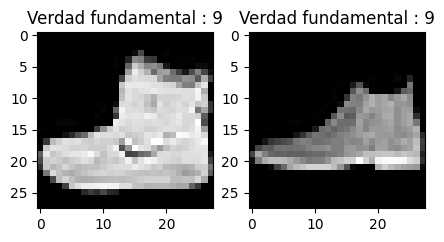

In [3]:
plt.figure(figsize=[5,5])

# Mostrar la primera imagen en los datos de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Verdad fundamental : {}".format(train_Y[0]))

# Mostrar la primera imagen en los datos de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Verdad fundamental : {}".format(test_Y[0]))

In [4]:
# Cambiar forma de imagen
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

# Convertir a tipo float32
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Cambiar las etiquetas de categóricas a one-hot encoding 
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar el cambio para etiqueta categoría usando one-hot encoding
print('Etiqueta original:', train_Y[0])
print('Después de la conversión a one-hot:', train_Y_one_hot[0])

Etiqueta original: 9
Después de la conversión a one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
# Dividir datos
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

# Definir variables 
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Input(shape=(28,28,1))) # Capa de entrada
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(negative_slope=0.1)) # Usar negative_slope en lugar de alpha
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(negative_slope=0.1)) # Usar negative_slope en lugar de alpha
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(negative_slope=0.1)) # Usar negative_slope en lugar de alpha
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(negative_slope=0.1)) # Usar negative_slope en lugar de alpha
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

# Entrenar el modelo
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

# Probar el modelo 
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

# Evaluar el modelo
print('Pérdida en la prueba:', test_eval[0])
print('Precisión en la prueba:', test_eval[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7551 - loss: 0.6735 - val_accuracy: 0.8732 - val_loss: 0.3553
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8892 - loss: 0.3037 - val_accuracy: 0.8975 - val_loss: 0.2831
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9107 - loss: 0.2399 - val_accuracy: 0.9072 - val_loss: 0.2579
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9243 - loss: 0.2070 - val_accuracy: 0.9165 - val_loss: 0.2337
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9310 - loss: 0.1850 - val_accuracy: 0.9174 - val_loss: 0.2311
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9424 - loss: 0.1555 - val_accuracy: 0.9181 - val_loss: 0.2338
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9500 - loss: 0.1336 - val_accuracy: 0.9246 - val_loss: 0.2213
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9600 - loss: 0.1081 - v

CORRECTAS

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Se encontraron 9156 etiquetas correctas


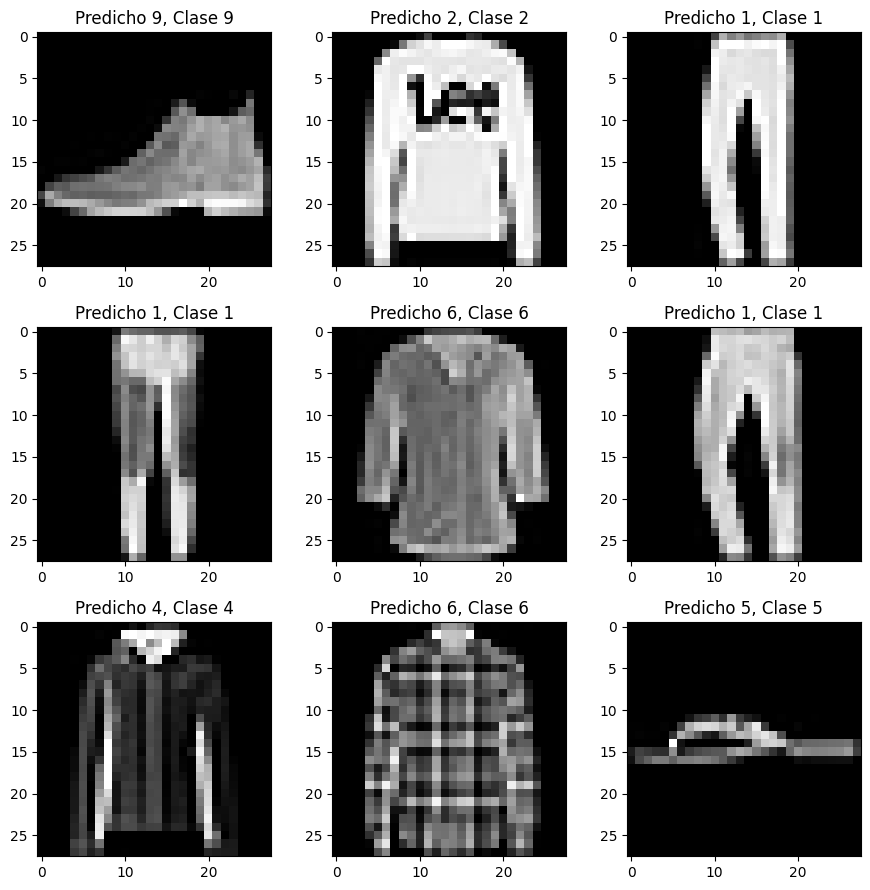

In [6]:
# Predecir etiquetas
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

# Graficar etiquetas correctas
correct_indices = np.where(predicted_classes==test_Y)[0]
print ("Se encontraron %d etiquetas correctas" % len(correct_indices))
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i, correct in enumerate(correct_indices[:min(9, len(correct_indices))]):
    axs[i//3, i%3].imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    axs[i//3, i%3].set_title("Predicho {}, Clase {}".format(predicted_classes[correct], test_Y[correct]))
plt.tight_layout()



INCORRECTAS

Se encontraron 844 etiquetas incorrectas
              precision    recall  f1-score   support

     Clase 0       0.85      0.86      0.86      1000
     Clase 1       0.98      0.99      0.99      1000
     Clase 2       0.87      0.84      0.86      1000
     Clase 3       0.92      0.93      0.92      1000
     Clase 4       0.88      0.85      0.87      1000
     Clase 5       0.98      0.98      0.98      1000
     Clase 6       0.75      0.77      0.76      1000
     Clase 7       0.96      0.98      0.97      1000
     Clase 8       0.98      0.99      0.99      1000
     Clase 9       0.99      0.97      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



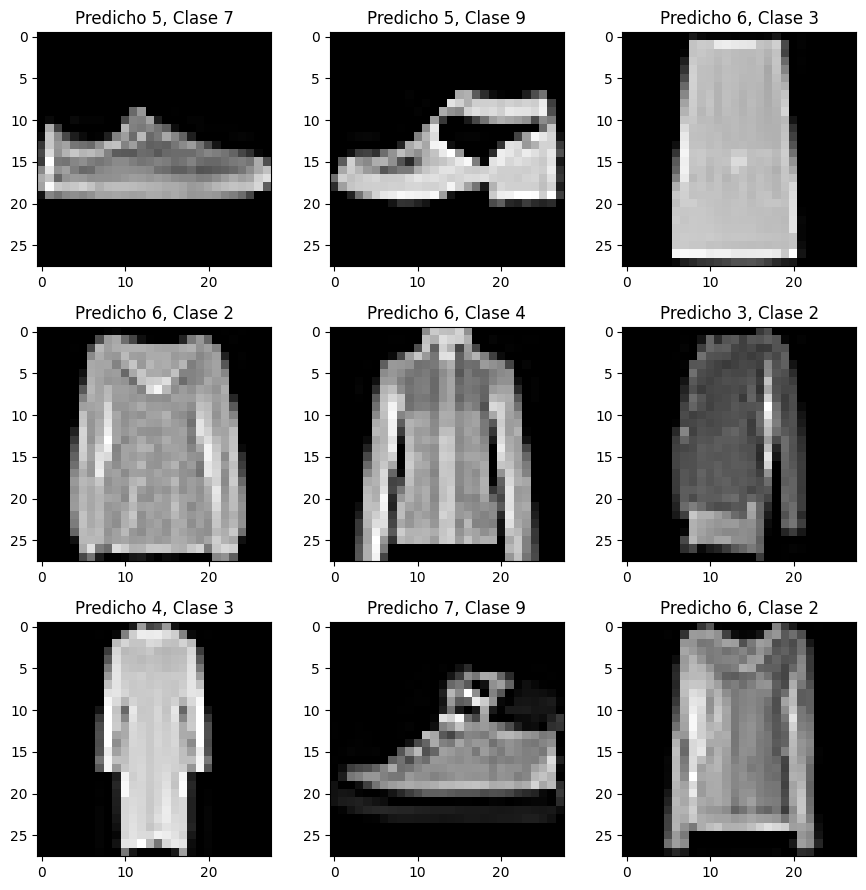

In [7]:
#Graficar etiquetas incorrectas
incorrect_indices = np.where(predicted_classes!=test_Y)[0] 
print ("Se encontraron %d etiquetas incorrectas" % len(incorrect_indices)) 
fig, axs = plt.subplots(3, 3, figsize=(9, 9)) 
for i, incorrect in enumerate(incorrect_indices[:min(9, len(incorrect_indices))]): 
    axs[i//3, i%3].imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none') 
    axs[i//3, i%3].set_title("Predicho {}, Clase {}".format(predicted_classes[incorrect], test_Y[incorrect])) 
    plt.tight_layout()

# Reporte de clasificación
from sklearn.metrics import classification_report
target_names = ["Clase {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))